#Import Libaries

In [1]:
pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.1 MB/s eta 0:00:00


In [57]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyvi import ViTokenizer
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import  LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

#Data Loading


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasetcs114.csv')
dataset

,Công an bắt tạm giam Nguyễn Minh Phúc,1
0,Quảng Bình: Phó bí thư Đảng ủy xã bị bắt quả t...,1.0
1,Vụ nữ sinh lớp 12 tử vong: Gia đình không khán...,1.0
2,Trang Nemo đã thi hành án 9 tháng tù?,1.0
3,Quảng Ninh: Độc quyền của chủ mỏ gây khó khăn ...,1.0
4,TP.HCM: Bất ngờ lời khai của nghi phạm cướp gi...,1.0
...,...,...
5101,Vợ tạt nước sôi chồng vì ghen,1.0
5102,Người chồng tông xe máy hại chết vợ trong cơn ...,1.0
5103,Gã đàn ông ở Bà Rịa - Vũng Tàu đoạt mạng người...,1.0
5104,Chồng phi tang xác vợ dưới giếng trong cơn ghen,1.0


#Data Processing

In [5]:
dataset.columns = ['Title','Is_neg']
dataset.head()

,Title,Is_neg
0,Quảng Bình: Phó bí thư Đảng ủy xã bị bắt quả t...,1.0
1,Vụ nữ sinh lớp 12 tử vong: Gia đình không khán...,1.0
2,Trang Nemo đã thi hành án 9 tháng tù?,1.0
3,Quảng Ninh: Độc quyền của chủ mỏ gây khó khăn ...,1.0
4,TP.HCM: Bất ngờ lời khai của nghi phạm cướp gi...,1.0


In [6]:
#Remove NaN
if dataset['Title'].isnull().values.any():
  dataset = dataset.dropna(subset=['Title'])
dataset

,Title,Is_neg
0,Quảng Bình: Phó bí thư Đảng ủy xã bị bắt quả t...,1.0
1,Vụ nữ sinh lớp 12 tử vong: Gia đình không khán...,1.0
2,Trang Nemo đã thi hành án 9 tháng tù?,1.0
3,Quảng Ninh: Độc quyền của chủ mỏ gây khó khăn ...,1.0
4,TP.HCM: Bất ngờ lời khai của nghi phạm cướp gi...,1.0
...,...,...
5101,Vợ tạt nước sôi chồng vì ghen,1.0
5102,Người chồng tông xe máy hại chết vợ trong cơn ...,1.0
5103,Gã đàn ông ở Bà Rịa - Vũng Tàu đoạt mạng người...,1.0
5104,Chồng phi tang xác vợ dưới giếng trong cơn ghen,1.0


In [7]:
#Remove Duplication
if dataset.duplicated('Title').any():
  dataset = dataset.drop_duplicates(subset='Title')
dataset.shape

(4518, 2)

In [8]:
#Lowercasing
dataset['Title'] = dataset['Title'].str.lower()
dataset.head()

<ipython-input-8-c27c4b70b874>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].str.lower()


,Title,Is_neg
0,quảng bình: phó bí thư đảng ủy xã bị bắt quả t...,1.0
1,vụ nữ sinh lớp 12 tử vong: gia đình không khán...,1.0
2,trang nemo đã thi hành án 9 tháng tù?,1.0
3,quảng ninh: độc quyền của chủ mỏ gây khó khăn ...,1.0
4,tp.hcm: bất ngờ lời khai của nghi phạm cướp gi...,1.0


In [9]:
#Remove Punctuations
def remove_punctuation(title):
    title = [char for char in title if char not in string.punctuation]
    removed = ''.join(title)
    return removed
dataset['Title'] = dataset['Title'].apply(remove_punctuation)
dataset.head()

<ipython-input-9-31c6de2e9b6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(remove_punctuation)


,Title,Is_neg
0,quảng bình phó bí thư đảng ủy xã bị bắt quả ta...,1.0
1,vụ nữ sinh lớp 12 tử vong gia đình không kháng...,1.0
2,trang nemo đã thi hành án 9 tháng tù,1.0
3,quảng ninh độc quyền của chủ mỏ gây khó khăn c...,1.0
4,tphcm bất ngờ lời khai của nghi phạm cướp giật...,1.0


In [10]:
#Tokenizer
dataset['Title'] = dataset['Title'].apply(ViTokenizer.tokenize)
dataset.head()

<ipython-input-10-2e088d66c563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(ViTokenizer.tokenize)


,Title,Is_neg
0,quảng_bình phó bí_thư đảng_ủy xã bị bắt quả_ta...,1.0
1,vụ nữ_sinh lớp 12 tử_vong gia_đình không kháng...,1.0
2,trang nemo đã thi_hành án 9 tháng tù,1.0
3,quảng_ninh độc_quyền của chủ mỏ gây khó_khăn c...,1.0
4,tphcm bất_ngờ lời khai của nghi phạm cướp_giật...,1.0


In [11]:
import requests

# URL of file stopwords
url = 'https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt'

# Request
response = requests.get(url)

if response.status_code == 200:
    # Save file 'vietnamese-stopwords.txt'
    with open('vietnamese-stopwords.txt', 'w') as f:
        f.write(response.text)
else:
    print('Error:', response.status_code)

with open('vietnamese-stopwords.txt', 'r') as f:
    vietnamese_stopwords = f.read().splitlines()

In [12]:
vietnamese_stopwords

['a lô',
 'a ha',
 'ai',
 'ai ai',
 'ai nấy',
 'ai đó',
 'alô',
 'amen',
 'anh',
 'anh ấy',
 'ba',
 'ba ba',
 'ba bản',
 'ba cùng',
 'ba họ',
 'ba ngày',
 'ba ngôi',
 'ba tăng',
 'bao giờ',
 'bao lâu',
 'bao nhiêu',
 'bao nả',
 'bay biến',
 'biết',
 'biết bao',
 'biết bao nhiêu',
 'biết chắc',
 'biết chừng nào',
 'biết mình',
 'biết mấy',
 'biết thế',
 'biết trước',
 'biết việc',
 'biết đâu',
 'biết đâu chừng',
 'biết đâu đấy',
 'biết được',
 'buổi',
 'buổi làm',
 'buổi mới',
 'buổi ngày',
 'buổi sớm',
 'bà',
 'bà ấy',
 'bài',
 'bài bác',
 'bài bỏ',
 'bài cái',
 'bác',
 'bán',
 'bán cấp',
 'bán dạ',
 'bán thế',
 'bây bẩy',
 'bây chừ',
 'bây giờ',
 'bây nhiêu',
 'bèn',
 'béng',
 'bên',
 'bên bị',
 'bên có',
 'bên cạnh',
 'bông',
 'bước',
 'bước khỏi',
 'bước tới',
 'bước đi',
 'bạn',
 'bản',
 'bản bộ',
 'bản riêng',
 'bản thân',
 'bản ý',
 'bất chợt',
 'bất cứ',
 'bất giác',
 'bất kì',
 'bất kể',
 'bất kỳ',
 'bất luận',
 'bất ngờ',
 'bất nhược',
 'bất quá',
 'bất quá chỉ',
 'bất thình l

In [13]:
dataset['Title'] = dataset['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))
dataset.head()

<ipython-input-13-268287829503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Title'] = dataset['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (vietnamese_stopwords)]))


,Title,Is_neg
0,quảng_bình phó bí_thư đảng_ủy xã bắt quả_tang ...,1.0
1,vụ nữ_sinh lớp 12 tử_vong gia_đình kháng_cáo,1.0
2,trang nemo thi_hành án 9 tù,1.0
3,quảng_ninh độc_quyền chủ mỏ khó_khăn san_lấp d...,1.0
4,tphcm bất_ngờ khai nghi phạm cướp_giật thủ đức,1.0


#Data Statistics

In [14]:
print("Negative news size: ", len(dataset[dataset['Is_neg']==1]), "\nPositive news size: ", len(dataset[dataset['Is_neg']==0]))

Negative news size:  2020 
Positive news size:  2498


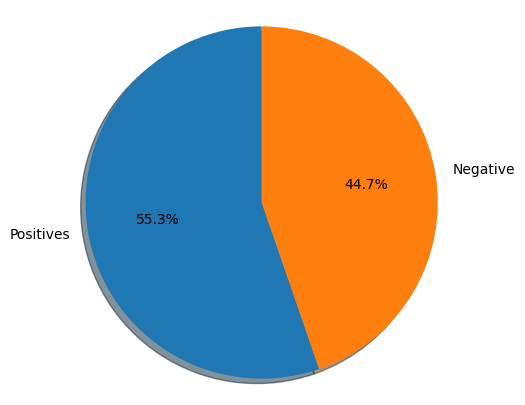

In [15]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(dataset[dataset['Is_neg']==0]), len(dataset[dataset['Is_neg']==1])]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

##Word Statistics

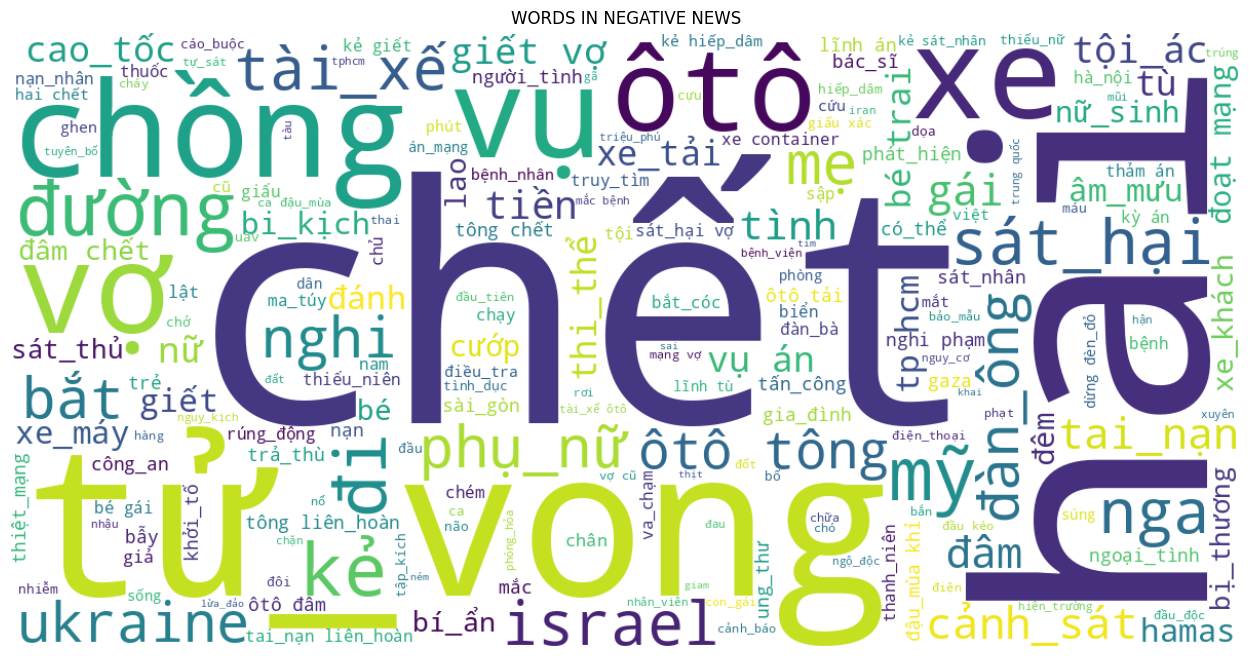

In [16]:
#Word in negative news
negative = dataset.loc[(dataset['Is_neg'] == 1)]
wordcloud = WordCloud(width = 1200, height = 600, background_color="white").generate(' '.join(negative.Title))
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORDS IN NEGATIVE NEWS")
plt.axis("off")
plt.show()

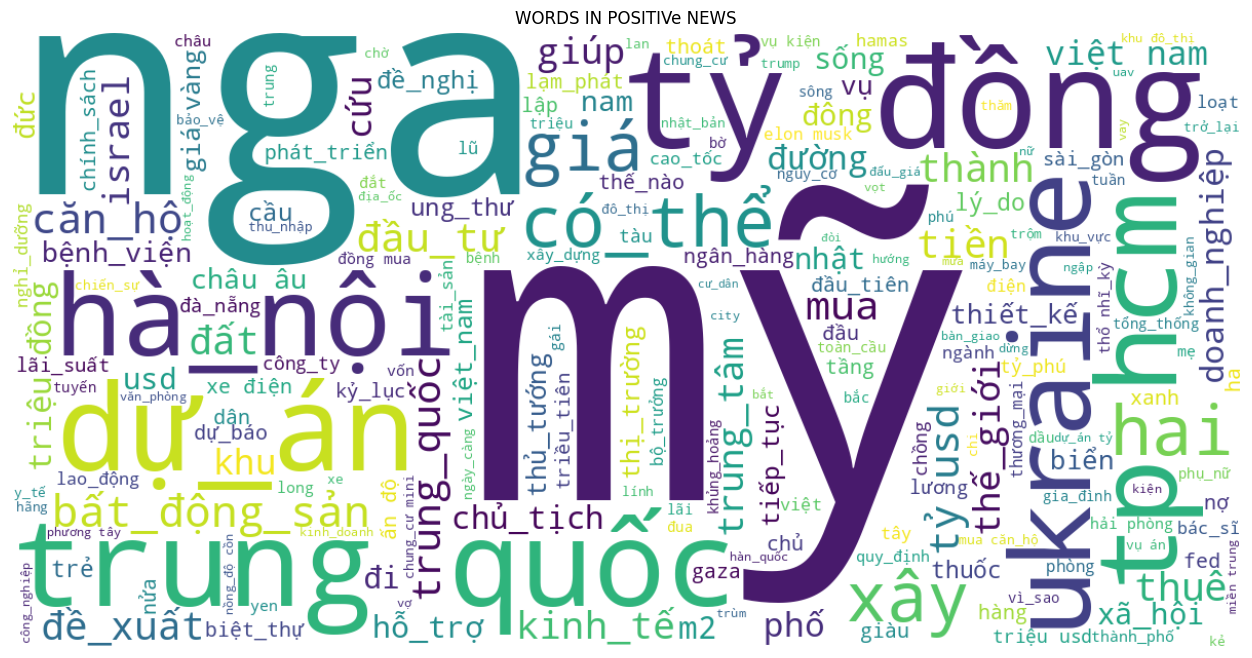

In [17]:
#Word in postive news
positive = dataset.loc[(dataset['Is_neg'] == 0)]
wordcloud = WordCloud(width = 1200, height = 600, background_color="white").generate(' '.join(positive.Title))
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("WORDS IN POSITIVe NEWS")
plt.axis("off")
plt.show()

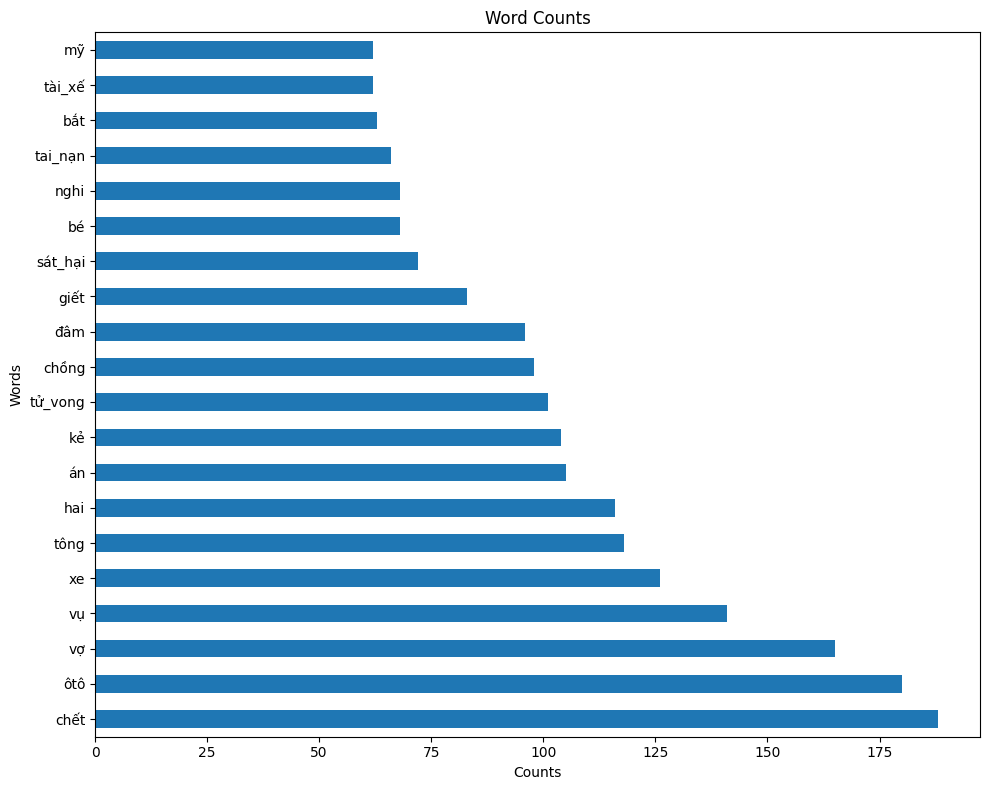

In [18]:
words = negative.Title.str.split()

# Thống kê số lượng mỗi từ
word_counts = words.explode().value_counts()

word_counts.sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,8))

plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Word Counts')

plt.tight_layout()
plt.show()


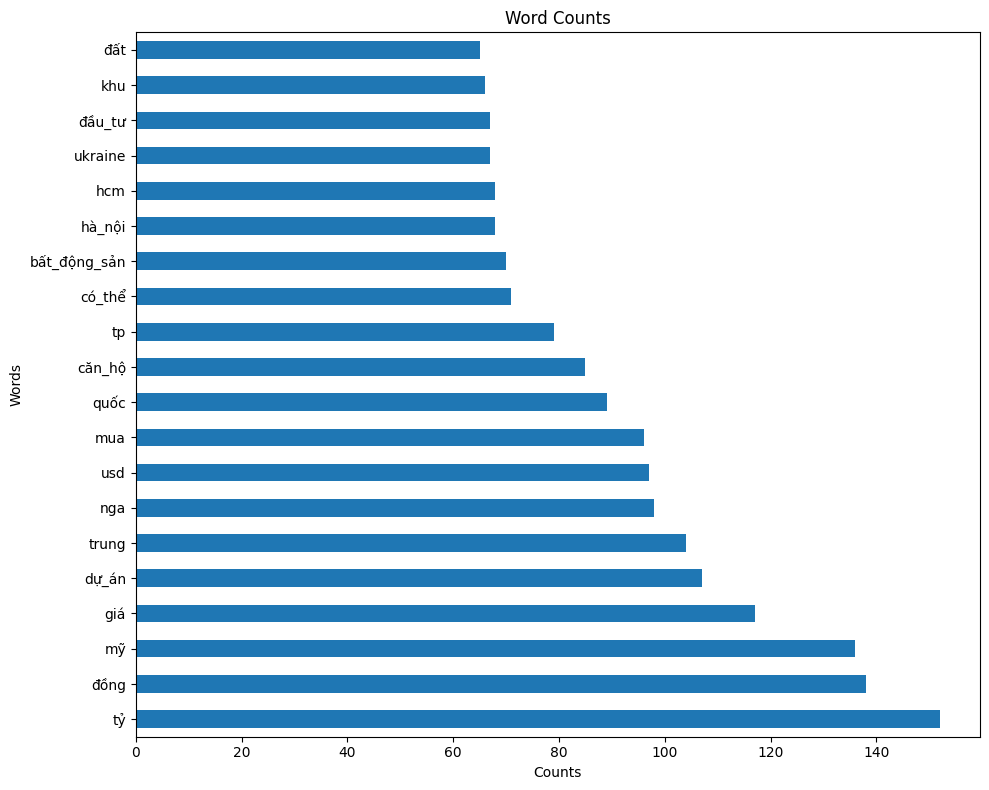

In [19]:
words = positive.Title.str.split()

# Thống kê số lượng mỗi từ
word_counts = words.explode().value_counts()

word_counts.sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,8))

plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Word Counts')

plt.tight_layout()
plt.show()

#Split Data

In [20]:
train, dev = train_test_split(dataset, test_size = 0.2, random_state = 42)

In [21]:
print('Shape of train',train.shape)
print('Shape of dev',dev.shape)

Shape of train (3614, 2)
Shape of dev (904, 2)


[Text(0.5, 1.0, 'Distribution in train')]

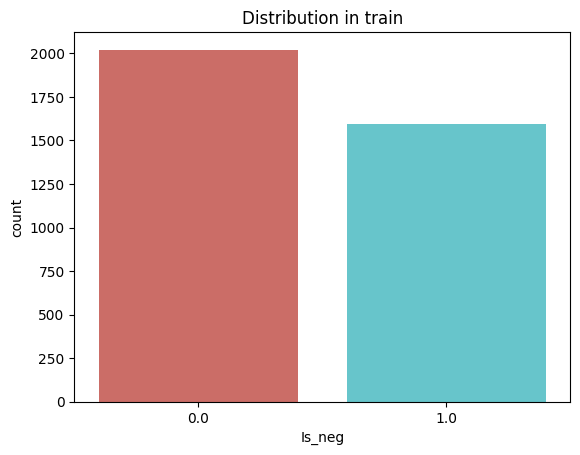

In [22]:
sb.countplot(x='Is_neg', data = train, palette='hls').set(title = "Distribution in train")

[Text(0.5, 1.0, 'Distribution in dev')]

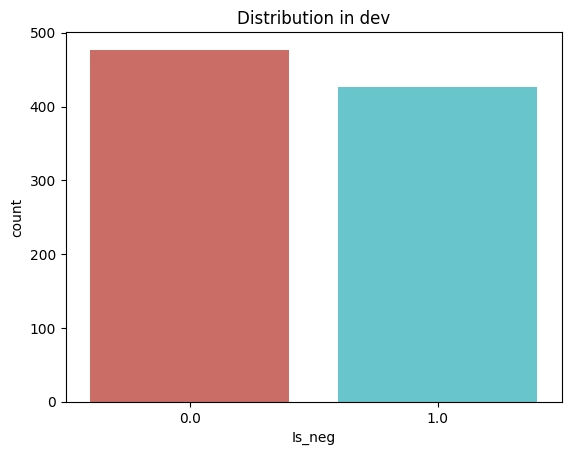

In [23]:
sb.countplot(x='Is_neg', data = dev, palette='hls').set(title = "Distribution in dev")

#Feature Engineering

##Count Vectors

In [29]:
Count_Vectorizer = CountVectorizer()

##Tf-IDF Vectors


In [30]:
Tf_IDF_Vectorizer = TfidfVectorizer(ngram_range=(1,3))

#Modeling

In [45]:
class Model:
    def __init__(self, Vectorizer, Model, train_title, train_is_neg, dev_title, dev_is_neg):
        self.vectorizer = Vectorizer
        self.model = Model
        self.train_title = train_title
        self.train_is_neg = train_is_neg
        self.dev_title = dev_title
        self.dev_is_neg = dev_is_neg

    def fit(self):
        self.vectorizer.fit(self.train_title)
        features = self.vectorizer.transform(self.train_title)
        self.model.fit(features, self.train_is_neg)

    def evaluate(self):
        features = self.vectorizer.transform(self.dev_title)
        dev_pred = self.model.predict(features)

        acc = accuracy_score(self.dev_is_neg, dev_pred)
        recall = recall_score(self.dev_is_neg, dev_pred)
        precision = precision_score(self.dev_is_neg, dev_pred)
        f1 = f1_score(self.dev_is_neg, dev_pred)

        print(f"Accuracy: {acc: .4f}")
        print(f"Recall: {recall: .4f}")
        print(f"Precision: {precision: .4f}")
        print(f"F1: {f1: .4f}")

        cm = confusion_matrix(self.dev_is_neg, dev_pred)

        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=["negative", "positive"]
        )

        disp.plot()
        plt.show()

##Logistic Regression

Accuracy:  0.8341
Recall:  0.7728
Precision:  0.8616
F1:  0.8148


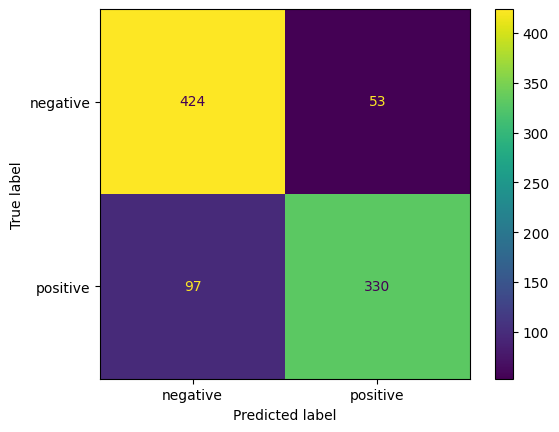

In [54]:
model = Model(Count_Vectorizer, LogisticRegression(max_iter = 10000), train['Title'], train['Is_neg'], dev['Title'], dev['Is_neg'])
model.fit()
model.evaluate()

Accuracy:  0.8219
Recall:  0.7447
Precision:  0.8595
F1:  0.7980


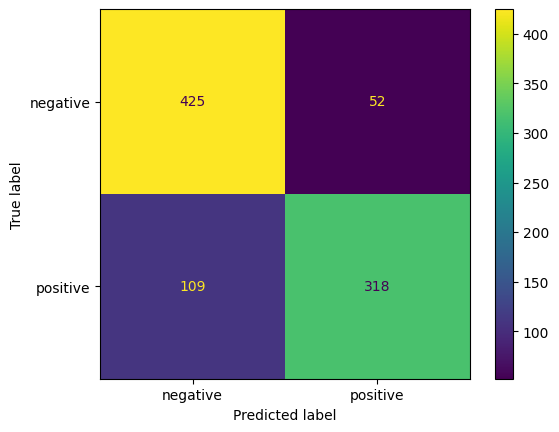

In [48]:
model = Model(Tf_IDF_Vectorizer, LogisticRegression(max_iter = 10000), train['Title'], train['Is_neg'], dev['Title'], dev['Is_neg'])
model.fit()
model.evaluate()

##SVM

Accuracy:  0.8363
Recall:  0.7635
Precision:  0.8740
F1:  0.8150


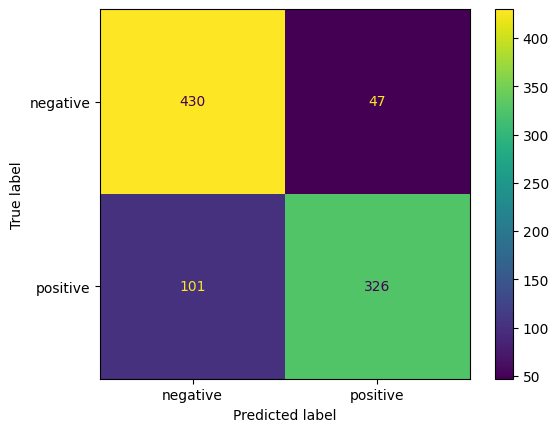

In [55]:
model = Model(Count_Vectorizer, svm.SVC(max_iter = 10000), train['Title'], train['Is_neg'], dev['Title'], dev['Is_neg'])
model.fit()
model.evaluate()

Accuracy:  0.8363
Recall:  0.7681
Precision:  0.8700
F1:  0.8159


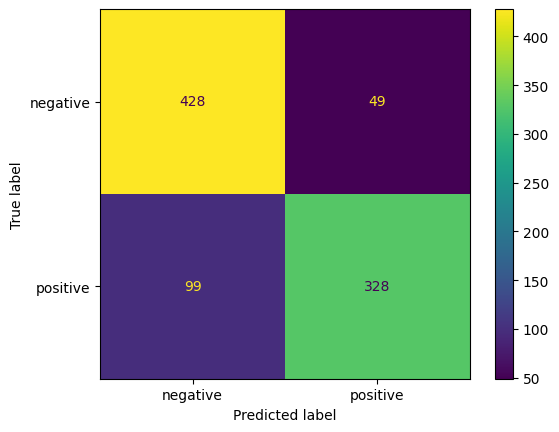

In [56]:
model = Model(Tf_IDF_Vectorizer, svm.SVC(max_iter = 10000), train['Title'], train['Is_neg'], dev['Title'], dev['Is_neg'])
model.fit()
model.evaluate()